<a href="https://colab.research.google.com/github/rohandatta/Face_Recognition_Drowsiness_Detection/blob/main/Drowsiness_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's build a drowsiness detection system

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import os
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
from google.colab.patches import cv2_imshow
from PIL import Image
from datetime import datetime
import io
import html
import time
import random
import pickle

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Attendence system and drowsiness alert/model.h5')

In [ ]:
! gdown --id 1RjbqDDgorp1F7FE7vt6S-WGdKAMvAWK_

Downloading...
From: https://drive.google.com/uc?id=1RjbqDDgorp1F7FE7vt6S-WGdKAMvAWK_
To: /content/haarcascade_frontalface_default.xml
100% 963k/963k [00:00<00:00, 85.7MB/s]


# Converting training images in the directory into an array for training deep neural network 

In [ ]:
  def get_train_data(work_dir):
    classes = ['Closed_eyes', 'Open_eyes']
    img_size = 224
    train_data = []
    for category in classes:
      path = os.path.join(work_dir, category)
      label = classes.index(category)
      for img in os.listdir(path):
          img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
          RGB_img = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
          scale_rgb_img = cv2.resize(RGB_img, (img_size,img_size))
          train_data.append([scale_rgb_img, label])

    return train_data



In [ ]:
file_name = "drive/MyDrive/Attendence system and drowsiness alert/train_data.pkl"

open_file = open(file_name, "wb")
pickle.dump(train_data, open_file)

open_file.close()

In [ ]:
file_name = "drive/MyDrive/Attendence system and drowsiness alert/train_data.pkl"
open_file = open(file_name, "rb")
train_data = pickle.load(open_file)
open_file.close()

In [ ]:
random.shuffle(train_data)

In [ ]:
def image_label_split():
  img_size = 224
  X = []
  y = []
  for data, label in train_data:
    X.append(data)
    y.append(label)
  X = np.array(X).reshape(-1,img_size, img_size, 3)
  X = X/255.0 #normalizing
  y = np.array(y)

  return X,y

In [ ]:
X, y = image_label_split()

In [ ]:
X.shape

(2553, 224, 224, 3)

In [ ]:
y.shape

(2553,)

# Transfer Learning 

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
# Using pretained layers from mobilenet
base_input = model.layers[0].input     
base_output = model.layers[-4].output
flat_layer = tf.keras.layers.Flatten()(base_output)
final_output = tf.keras.layers.Dense(1)(flat_layer)
final_output = tf.keras.layers.Activation('sigmoid')(final_output)

In [ ]:
# New model
new_model = tf.keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

# Let's train this new model with our train data

In [ ]:
new_model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy']) 

In [ ]:
new_model.fit(X, y, epochs = 10, verbose = 2, validation_split = 0.3 )

Epoch 1/10
56/56 - 47s - loss: 0.1767 - accuracy: 0.9463 - val_loss: 3.7157 - val_accuracy: 0.5809
Epoch 2/10
56/56 - 10s - loss: 0.0409 - accuracy: 0.9860 - val_loss: 0.2161 - val_accuracy: 0.9191
Epoch 3/10
56/56 - 10s - loss: 0.0117 - accuracy: 0.9972 - val_loss: 0.0761 - val_accuracy: 0.9726
Epoch 4/10
56/56 - 11s - loss: 0.0280 - accuracy: 0.9910 - val_loss: 1.9192 - val_accuracy: 0.8107
Epoch 5/10
56/56 - 11s - loss: 0.0233 - accuracy: 0.9938 - val_loss: 1.3485 - val_accuracy: 0.6984
Epoch 6/10
56/56 - 11s - loss: 0.0098 - accuracy: 0.9978 - val_loss: 0.0413 - val_accuracy: 0.9909
Epoch 7/10
56/56 - 11s - loss: 0.0066 - accuracy: 0.9989 - val_loss: 0.1050 - val_accuracy: 0.9700
Epoch 8/10
56/56 - 11s - loss: 0.0035 - accuracy: 0.9983 - val_loss: 0.2024 - val_accuracy: 0.9569
Epoch 9/10
56/56 - 11s - loss: 8.2357e-04 - accuracy: 1.0000 - val_loss: 0.0799 - val_accuracy: 0.9804
Epoch 10/10
56/56 - 11s - loss: 4.7270e-04 - accuracy: 1.0000 - val_loss: 0.0490 - val_accuracy: 0.9909


In [ ]:
new_model.save('/content/drive/MyDrive/Attendence system and drowsiness alert/model.h5')

# Let's check on unknown images

In [ ]:
def detect_eyes(image_path):
  eyes_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Attendence system and drowsiness alert/haarcascade_eye.xml')
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  eyes = eyes_cascade.detectMultiScale(gray, 1.1, 4)
  
  if len(eyes) == 0:
    print('No eyes detected')
  else :
    for x,y,w,h in eyes:
      cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
      roigray = gray[y:y+h, x:x+w]
      roicolor = img[y:y+h, x:x+w]
      # cv2.imwrite(str(i) + '.jpg', img[y:y+h,x:x+w])

  plt.grid(None)   
  plt.xticks([])
  plt.yticks([])
  imgplot = plt.imshow(img[:,:,[2,1,0]])
  return eyes



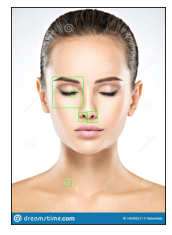

In [ ]:
eye = detect_eyes('/content/drive/MyDrive/Attendence system and drowsiness alert/front-portrait-woman-beauty-face-isolated-closed-eye-165392211.jpg')

In [ ]:
def crop_eye(image_path):
  eyes_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Attendence system and drowsiness alert/haarcascade_eye.xml')
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  eyes = eyes_cascade.detectMultiScale(gray, 1.1, 4)
  if len(eyes) == 0:
    print('No eyes detected')
  else:
    for x,y,w,h in eyes:
      roigray = gray[y:y+h, x:x+w]
      roicolor = img[y:y+h, x:x+w]

      return roicolor

In [ ]:
eye = crop_eye('/content/drive/MyDrive/Attendence system and drowsiness alert/KnownFaces/Sudhanshu.png')

In [ ]:
eye.shape

(42, 42, 3)

In [ ]:
# resize
eye = cv2.resize(eye, (224,224))
eye = np.expand_dims(eye, axis = 0)
eye = eye/255.0

In [ ]:
model.predict(eye)

array([[0.99987423]], dtype=float32)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
img.shape

(42, 42, 3)

In [ ]:
# img = cv2.imread('/content/0.jpg')
img = Image.open('/content/0.jpg')
img = img.resize((224,224))
img = np.array(img)
img = img.reshape((-1,224,224,3))
model.predict(img)

array([[0.07949574]], dtype=float32)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Attendence system and drowsiness alert/download.jpg')
img.shape

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Attendence system and drowsiness alert/model.h5')

In [ ]:
class face_identifier:

  def __init__(self, path, model):
    self.path = path
    self.images = []
    self.names = []
    self.model = model

    mylist = os.listdir(path)
    for img in mylist:
      cur_img = cv2.imread(f'{path}/{img}')
      self.images.append(cur_img)
      self.names.append(os.path.splitext(img)[0])
    
    

  # function to convert the JavaScript object into an OpenCV image
  def js_to_image(self,js_reply):
    """
    Params:
            js_reply: JavaScript object containing image from webcam
    Returns:
            img: OpenCV BGR image
    """
    # decode base64 image
    image_bytes = b64decode(js_reply.split(',')[1])
    # convert bytes to numpy array
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    # decode numpy array into OpenCV BGR image
    img = cv2.imdecode(jpg_as_np, flags=1)

    return img

  # function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
  def bbox_to_bytes(self,bbox_array):
    """
    Params:
            bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
    Returns:
          bytes: Base64 image byte string
    """
    # convert array into PIL image
    bbox_PIL = Image.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    # format bbox into png for return
    bbox_PIL.save(iobuf, format='png')
    # format return string
    bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

    return bbox_bytes

  def crop_eyes(self,img):
      eyes_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Attendence system and drowsiness alert/haarcascade_eye.xml')
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      eye_loc = eyes_cascade.detectMultiScale(gray, 1.1, 4)
      
      for x,y,w,h in eye_loc:
        roigray = gray[y:y+h, x:x+w]
        roicolor = img[y:y+h, x:x+w]

        return roicolor
      
  def eye_detector(self,img):
    # img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eyes_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Attendence system and drowsiness alert/haarcascade_eye.xml')
    eye_loc = eyes_cascade.detectMultiScale(gray, 1.1, 4)

    return eye_loc

    

  # JavaScript to properly create our live video stream using our webcam as input
  def video_stream(self):
    js = Javascript('''
      var video;
      var div = null;
      var stream;
      var captureCanvas;
      var imgElement;
      var labelElement;
      
      var pendingResolve = null;
      var shutdown = false;
      
      function removeDom() {
        stream.getVideoTracks()[0].stop();
        video.remove();
        div.remove();
        video = null;
        div = null;
        stream = null;
        imgElement = null;
        captureCanvas = null;
        labelElement = null;
      }
      
      function onAnimationFrame() {
        if (!shutdown) {
          window.requestAnimationFrame(onAnimationFrame);
        }
        if (pendingResolve) {
          var result = "";
          if (!shutdown) {
            captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
            result = captureCanvas.toDataURL('image/jpeg', 0.8)
          }
          var lp = pendingResolve;
          pendingResolve = null;
          lp(result);
        }
      }
      
      async function createDom() {
        if (div !== null) {
          return stream;
        }

        div = document.createElement('div');
        div.style.border = '2px solid black';
        div.style.padding = '3px';
        div.style.width = '100%';
        div.style.maxWidth = '600px';
        document.body.appendChild(div);
        
        const modelOut = document.createElement('div');
        modelOut.innerHTML = "<span>Status:</span>";
        labelElement = document.createElement('span');
        labelElement.innerText = 'No data';
        labelElement.style.fontWeight = 'bold';
        modelOut.appendChild(labelElement);
        div.appendChild(modelOut);
            
        video = document.createElement('video');
        video.style.display = 'block';
        video.width = div.clientWidth - 6;
        video.setAttribute('playsinline', '');
        video.onclick = () => { shutdown = true; };
        stream = await navigator.mediaDevices.getUserMedia(
            {video: { facingMode: "environment"}});
        div.appendChild(video);

        imgElement = document.createElement('img');
        imgElement.style.position = 'absolute';
        imgElement.style.zIndex = 1;
        imgElement.onclick = () => { shutdown = true; };
        div.appendChild(imgElement);
        
        const instruction = document.createElement('div');
        instruction.innerHTML = 
            '<span style="color: red; font-weight: bold;">' +
            'When finished, click here or on the video to stop this demo</span>';
        div.appendChild(instruction);
        instruction.onclick = () => { shutdown = true; };
        
        video.srcObject = stream;
        await video.play();

        captureCanvas = document.createElement('canvas');
        captureCanvas.width = 640; //video.videoWidth;
        captureCanvas.height = 480; //video.videoHeight;
        window.requestAnimationFrame(onAnimationFrame);
        
        return stream;
      }
      async function stream_frame(label, imgData) {
        if (shutdown) {
          removeDom();
          shutdown = false;
          return '';
        }

        var preCreate = Date.now();
        stream = await createDom();
        
        var preShow = Date.now();
        if (label != "") {
          labelElement.innerHTML = label;
        }
              
        if (imgData != "") {
          var videoRect = video.getClientRects()[0];
          imgElement.style.top = videoRect.top + "px";
          imgElement.style.left = videoRect.left + "px";
          imgElement.style.width = videoRect.width + "px";
          imgElement.style.height = videoRect.height + "px";
          imgElement.src = imgData;
        }
        
        var preCapture = Date.now();
        var result = await new Promise(function(resolve, reject) {
          pendingResolve = resolve;
        });
        shutdown = false;
        
        return {'create': preShow - preCreate, 
                'show': preCapture - preShow, 
                'capture': Date.now() - preCapture,
                'img': result};
      }
      ''')

    display(js)
    
  def video_frame(self,label, bbox):
    data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
    return data

  def get_encodings(self):
    encode_list = []
    for img in self.images:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      encode = face_recognition.face_encodings(img)[0]
      encode_list.append(encode)

    return encode_list

  def start_recognising(self):
    # start streaming video from webcam
    self.video_stream()
    # label for video
    label_html = 'Capturing...'
    # initialze bounding box to empty
    bbox = ''
    count = 0 
    while True:
        js_reply = self.video_frame(label_html, bbox)
        if not js_reply:
            break

        # convert JS response to OpenCV Image
        web_img = self.js_to_image(js_reply["img"])

        # create transparent overlay for bounding box
        bbox_array = np.zeros([480,640,4], dtype=np.uint8)

        # grayscale image for face detection
        # web_img = cv2.imread(img)
        scale_img = cv2.resize(web_img, (0,0), None, 0.25, 0.25)
        scale_img = cv2.cvtColor(scale_img, cv2.COLOR_BGR2RGB)

        facesCurFrame = face_recognition.face_locations(scale_img)
        encodesCurframe = face_recognition.face_encodings(scale_img, facesCurFrame)

        if len(facesCurFrame) == 0:
          print('No face Detected')

        for encodesCurface, faceloc in zip(encodesCurframe, facesCurFrame):
          matches = face_recognition.compare_faces(self.get_encodings(), encodesCurface, tolerance= 0.5)
          faceDis = face_recognition.face_distance(encodeList_known, encodesCurface)
          matchIndex = np.argmin(faceDis)

          if matches[matchIndex]:
            person_name = self.names[matchIndex].upper()
            # print(person_name)

            (top, right, bottom, left) = faceloc
            top, right, bottom, left =  top * 4, right * 4, bottom * 4, left * 4
            bbox_array = cv2.rectangle(bbox_array,(left,top),(right,bottom),(0, 255,0),2)
            cv2.rectangle(bbox_array, (left, top), (right, bottom), (0, 255, 0), 2)
            cv2.rectangle(bbox_array, (left, bottom + 35), (right, bottom), (0, 255, 0), cv2.FILLED)
            cv2.putText(bbox_array, person_name, (left + 6, bottom + 12), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255), 2)

            # cv2_imshow(web_img)

          else:
            
            (top, right, bottom, left) = faceloc
            top, right, bottom, left =  top * 4, right * 4, bottom * 4, left * 4
            cv2.rectangle(bbox_array, (left, top), (right, bottom), (0, 255, 0), 2)
            cv2.rectangle(bbox_array, (left, bottom + 35), (right, bottom), (0, 255, 0), cv2.FILLED)
            cv2.putText(bbox_array, 'Unknown Face', (left + 6, bottom + 15), cv2.FONT_HERSHEY_PLAIN, 1.8, (255,255,255), 2)

            # cv2_imshow(web_img)

        bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
        # convert overlay of bbox into bytes
        bbox_bytes = self.bbox_to_bytes(bbox_array)
        # update bbox so next frame gets new overlay
        bbox = bbox_bytes

  def start_detecting_drowsiness(self):
      # start streaming video from webcam
      self.video_stream()
      # label for video
      label_html = 'Capturing...'
      # initialze bounding box to empty
      bbox = ''
      count = 0 
      while True:
          js_reply = self.video_frame(label_html, bbox)
          if not js_reply:
              break

          # convert JS response to OpenCV Image
          web_img = self.js_to_image(js_reply["img"])

          # create transparent overlay for bounding box
          bbox_array = np.zeros([480,640,4], dtype=np.uint8)
          eyeloc = self.eye_detector(web_img)
          if len(eyeloc) == 0:
             print('No eyes detected')
          
          # resize
          else:
            eye = self.crop_eyes(web_img)
            eye = cv2.resize(eye, (224,224))
            eye = np.expand_dims(eye, axis = 0)
            eye = eye/255.0

            prediction = model.predict(eye)
            if prediction > 0.5:
              status = 'Open eyes'
            else:
              status = 'Closed eyes'

            for x,y,w,h in eyeloc:
                bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w, y+h),(0, 255,0),2)
                cv2.rectangle(bbox_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                cv2.putText(bbox_array, status, (300,30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2 )




            # grayscale image for face detection
            # web_img = cv2.imread(img)
        
            
          bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
          # convert overlay of bbox into bytes
          bbox_bytes = self.bbox_to_bytes(bbox_array)
          # update bbox so next frame gets new overlay
          bbox = bbox_bytes


          


              # cv2.rectangle(bbox_array, (left, top), (right, bottom), (0, 255, 0), 2)
              # cv2.rectangle(bbox_array, (left, bottom + 35), (right, bottom), (0, 255, 0), cv2.FILLED)
              # cv2.putText(bbox_array, person_name, (left + 6, bottom + 12), cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,255,255), 2)

    


  
  


In [ ]:
ob = face_identifier('drive/MyDrive/Attendence system and drowsiness alert/KnownFaces',model )

In [ ]:
ob.start_detecting_drowsiness()

<IPython.core.display.Javascript object>

In [ ]:
eyes_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Attendence system and drowsiness alert/haarcascade_eye.xml')
  img = cv2.imread(image_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  eyes = eyes_cascade.detectMultiScale(gray, 1.1, 4)
  
  if len(eyes) == 0:
    print('No eyes detected')
  else :
    for x,y,w,h in enumerate(eyes):
      cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
      roigray = gray[y:y+h, x:x+w]
      roicolor = img[y:y+h, x:x+w]
      # cv2.imwrite(str(i) + '.jpg', img[y:y+h,x:x+w])

  plt.grid(None)   
  plt.xticks([])
  plt.yticks([])
  imgplot = plt.imshow(img[:,:,[2,1,0]])

In [ ]:
x,y,w,h = eye[0]

In [ ]:
from imutils import face_utils
from imutils.video import VideoStream
import argparse
import imutils
import dlib

In [ ]:
def eye_detector(image):
  img = cv2.imread(image)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  detector = dlib.get_frontal_face_detector()
  face = detector(gray,1)
  predictor = dlib.shape_predictor('drive/MyDrive/Attendence system and drowsiness alert/shape_predictor_68_face_landmarks.dat')
  shape = predictor(gray, face[0])
  # for left eye
  x1 = shape.part(36).x
  x2 = shape.part(39).x
  y1=shape.part(37).y 
  y2=shape.part(40).y

  lefteye=img[y1:y2,x1:x2]
  
  # for right eye

  a1 = shape.part(42).x
  a2 = shape.part(45).x
  b1 = shape.part(43).y
  b2 = shape.part(47).y

  righteye = img[b1:b2,a1:a2]
  eye_loc = [(x1,x2,y1,y2), (a1,a2,b1,b2)]

  return eye_loc, righteye

